In [1]:
import pyedflib as plib
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import random
import matplotlib
from matplotlib.pyplot import specgram
from scipy.signal import spectrogram


## Generamos los excells para entrenar

#### Recorermos la lista y generamos los excels

In [2]:
import pandas as pd

d_sex = {0:"Hombre",
         1 : "Mujer"}

d_label = {0: 0,
         2 : 1}

# Define column names
df_info = pd.read_csv('../zhang-wamsley-2019/Records.csv', delimiter=',', header=0)    
df_info['Subject sex'] = df_info['Subject sex'].map(lambda x: d_sex[x])
df_info

,Filename,Case ID,Subject ID,Experience,Treatment group,Duration,EEG sample rate,Number of EEG channels,Last sleep stage,Has EOG,Has EMG,Has ECG,Proportion artifacts,Time of awakening,Subject age,Subject sex,Subject healthy,Has more data,Remarks
0,subject010_Morning.edf,10_Morning,10,2,NaN,73,400,58,5,1,1,0,NaN,7:17:27 AM,23,Hombre,1,1,NaN
1,subject010_NREM.edf,10_NREM,10,2,NaN,73,400,58,2,1,1,0,NaN,2:07:02 AM,23,Hombre,1,1,NaN
2,subject010_REM.edf,10_REM,10,2,NaN,73,400,58,5,1,1,0,NaN,3:50:48 AM,23,Hombre,1,1,NaN
3,subject010_SO1.edf,10_SO1,10,0,NaN,73,400,58,1,1,1,0,NaN,12:16:08 AM,23,Hombre,1,1,NaN
4,subject010_SO10.edf,10_SO10,10,2,NaN,73,400,58,2,1,1,0,NaN,12:54:12 AM,23,Hombre,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,subject535_SO5.edf,535_SO5,535,2,NaN,73,400,58,0,1,1,0,NaN,12:34:25 AM,21,Mujer,1,1,NaN
304,subject535_SO6.edf,535_SO6,535,2,NaN,73,400,58,1,1,1,0,NaN,12:39:22 AM,21,Mujer,1,1,NaN
305,subject535_SO7.edf,535_SO7,535,2,NaN,73,400,58,1,1,1,0,NaN,12:43:30 AM,21,Mujer,1,1,NaN
306,subject535_SO8.edf,535_SO8,535,2,NaN,73,400,58,1,1,1,0,NaN,12:45:20 AM,21,Mujer,1,1,NaN


In [3]:
df_info['Experience'].value_counts(normalize=True)

2    0.772727
0    0.227273
Name: Experience, dtype: float64

In [4]:
folder_path = "../zhang-wamsley-2019/data/PSG/"
d_user_info_1 = {}
d_user_info_0 = {}
d_user_info = {}

for index in df_info.index:
    label = int(df_info['Experience'][index])
    user = df_info['Subject ID'][index]
    signals_edf, signals_headers_edf, header_edf = plib.highlevel.read_edf(edf_file=os.path.join(folder_path, df_info['Filename'][index]))
    
    if user not in d_user_info:
            d_user_info[user] = len(signals_edf[0]) 
    else:
        d_user_info[user] = d_user_info[user] + len(signals_edf[0])

    if label == 2:
        if user not in d_user_info_1:
            d_user_info_1[user] = len(signals_edf[0]) 
        else:
            d_user_info_1[user] = d_user_info_1[user] + len(signals_edf[0])
    elif label == 0:
        if user not in d_user_info_0:
            d_user_info_0[user] = len(signals_edf[0]) 
        else:
            d_user_info_0[user] = d_user_info_0[user] + len(signals_edf[0])

In [5]:
l_users = list(d_user_info_0.keys())
l_users

[10,
 26,
 30,
 42,
 83,
 88,
 181,
 183,
 185,
 228,
 245,
 249,
 266,
 309,
 337,
 347,
 348,
 374,
 384,
 388,
 411,
 422,
 452,
 455,
 512]

In [6]:
d_user_info_0

{10: 29220,
 26: 58440,
 30: 263406,
 42: 58440,
 83: 88086,
 88: 29220,
 181: 87660,
 183: 233760,
 185: 29220,
 228: 176598,
 245: 58440,
 249: 58440,
 266: 87660,
 309: 29646,
 337: 175746,
 347: 29220,
 348: 117216,
 374: 29220,
 384: 29220,
 388: 58440,
 411: 146526,
 422: 58866,
 452: 29220,
 455: 58440,
 512: 29220}

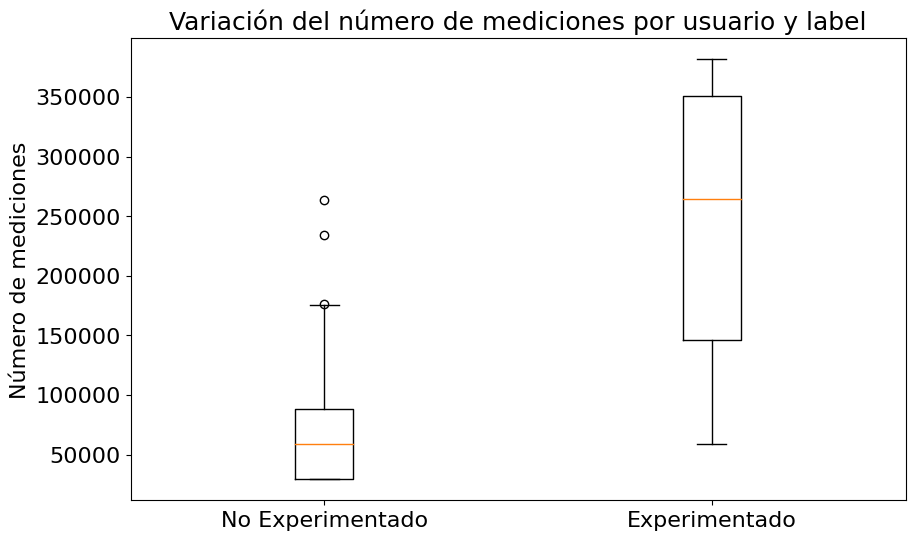

In [7]:
data = [list(d_user_info_0.values()), list(d_user_info_1.values())]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['No Experimentado', 'Experimentado'])
plt.title('Variación del número de mediciones por usuario y label', fontsize=18)
plt.ylabel('Número de mediciones', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

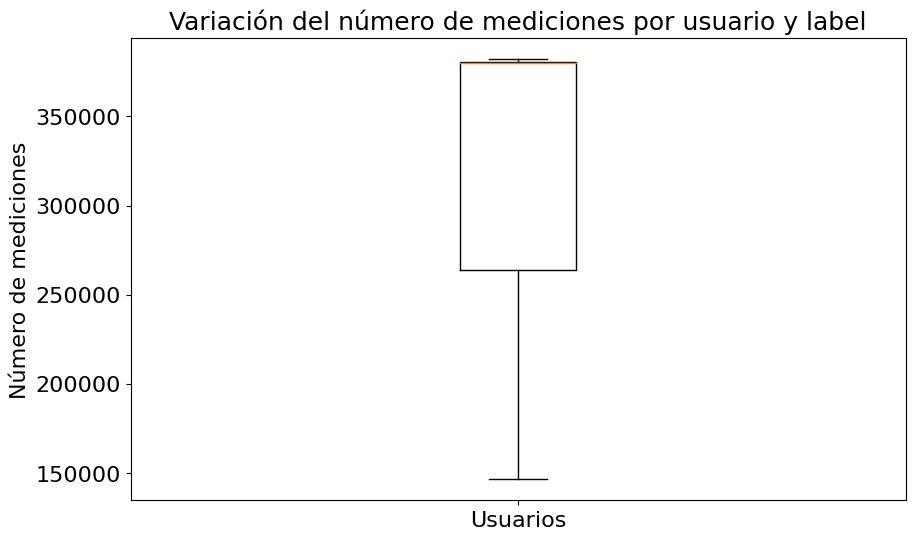

In [42]:
# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(list(d_user_info.values()), labels=['Usuarios'])
plt.title('Variación del número de mediciones por usuario y label', fontsize=18)
plt.ylabel('Número de mediciones', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

In [22]:
random.shuffle(l_users)
l_users

[249,
 266,
 374,
 10,
 388,
 88,
 185,
 422,
 107,
 26,
 455,
 348,
 337,
 384,
 42,
 309,
 245,
 183,
 411,
 347,
 512,
 228,
 535,
 83,
 126,
 30,
 452,
 181]

In [23]:
train, validate, test = np.split(l_users, [int(len(l_users)*0.7), int(len(l_users)*0.85)])

In [33]:
train

array([249, 266, 374,  10, 388,  88, 185, 422, 107,  26, 455, 348, 337,
       384,  42, 309, 245, 183, 411], dtype=int64)

In [32]:
validate

array([347, 512, 228, 535], dtype=int64)

In [31]:
test

array([ 83, 126,  30, 452, 181], dtype=int64)

In [72]:
d_user_info

{10: 381138,
 26: 379860,
 30: 380286,
 42: 204540,
 83: 146526,
 88: 379860,
 107: 351492,
 126: 381564,
 181: 380712,
 183: 379860,
 185: 263832,
 228: 322698,
 245: 379860,
 249: 380712,
 266: 175320,
 309: 381564,
 337: 263832,
 347: 379860,
 348: 293040,
 374: 380286,
 384: 175320,
 388: 175320,
 411: 381990,
 422: 381564,
 452: 263406,
 455: 292200,
 512: 379860,
 535: 379860}

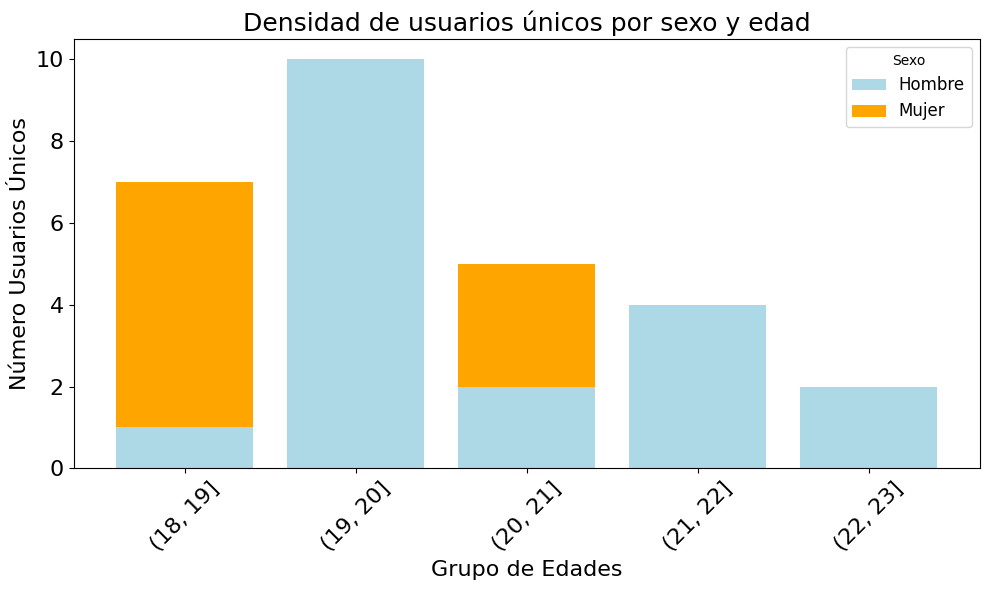

In [97]:
# Assuming 'df_info' is your DataFrame

# Step 1: Bin ages (adjust bins according to your data's age distribution)
age_bins = range(df_info['Subject age'].min(), df_info['Subject age'].max() + 1, 1)  # Adjust the bin size as needed
df_info['age_group'] = pd.cut(df_info['Subject age'], bins=age_bins, right=True, include_lowest=True)

# Step 2: Count unique user_ids within each (age group, sex) combination
grouped = df_info.groupby(['age_group', 'Subject sex'])['Subject ID'].nunique().unstack(fill_value=0)

colors = ['orange' if sex == 'Mujer' else 'lightblue' for sex in grouped.columns]

# Step 3: Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)
plt.title('Densidad de usuarios únicos por sexo y edad', fontsize=18)
plt.xlabel('Grupo de Edades', fontsize=16)
plt.ylabel('Número Usuarios Únicos', fontsize=16)
plt.xticks(ticks = [0,1,2,3,4], labels=['(18, 19]', '(19, 20]', '(20, 21]', '(21, 22]', '(22, 23]'], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Sexo', fontsize=12)
plt.tight_layout()
plt.show()

In [3]:
folder_path = "zhang-wamsley-2019/data/PSG/"

l_edf_files = glob.glob(folder_path+"*.edf")
len(l_edf_files)

308

In [ ]:
folder_path = "zhang-wamsley-2019/data/CSV2/"

l_edf_files = glob.glob(folder_path+"*.csv")
len(l_edf_files)

In [5]:
for i, edf_file in enumerate(l_edf_files[:]):
    # Load the PSG and Hypnogram files
    signals_edf, signals_headers_edf, header_edf = plib.highlevel.read_edf(edf_file=edf_file)

    user_id = df_info[df_info['Filename'] == os.path.basename(edf_file)]['Subject ID'].values[0]
    sex = df_info[df_info['Filename'] == os.path.basename(edf_file)]['Subject sex'].values[0]
    label = d_label[df_info[df_info['Filename'] == os.path.basename(edf_file)]['Experience'].values[0]]
    
    d_signals = {f'sensor_{i}':signals_edf[i] for i in range(len(signals_edf))}

    data = pd.DataFrame(d_signals).round(2)
    """data['user_id'] = user_id
    data['sex'] = sex"""
    data['label'] = label
    
    # Save the DataFrame to a CSV file
    saving_path = f'zhang-wamsley-2019/data/CSV/{os.path.basename(edf_file)[:-4]}-{label}.csv'
    if len(signals_edf) == 63:
        data.to_csv(saving_path, sep=';', index=False)
        print(f'Saving: {saving_path}  -->>  {i}/{len(l_edf_files)}')
    
    else: 
        print("------------------------------")
        print(f"Not saving: {saving_path}")

Saving: zhang-wamsley-2019/data/CSV/subject026_Morning-1.csv  -->>  0/308
Saving: zhang-wamsley-2019/data/CSV/subject411_NREM-0.csv  -->>  1/308
Saving: zhang-wamsley-2019/data/CSV/subject266_Morning-0.csv  -->>  2/308
Saving: zhang-wamsley-2019/data/CSV/subject185_REM-1.csv  -->>  3/308
------------------------------
Not saving: zhang-wamsley-2019/data/CSV/subject348_SO2-1.csv
Saving: zhang-wamsley-2019/data/CSV/subject181_SO1-1.csv  -->>  5/308
Saving: zhang-wamsley-2019/data/CSV/subject088_REM-1.csv  -->>  6/308
Saving: zhang-wamsley-2019/data/CSV/subject374_SO3-1.csv  -->>  7/308
Saving: zhang-wamsley-2019/data/CSV/subject337_SO3-1.csv  -->>  8/308
Saving: zhang-wamsley-2019/data/CSV/subject535_SO8-1.csv  -->>  9/308
Saving: zhang-wamsley-2019/data/CSV/subject422_SO4-1.csv  -->>  10/308
Saving: zhang-wamsley-2019/data/CSV/subject535_REM-1.csv  -->>  11/308
Saving: zhang-wamsley-2019/data/CSV/subject228_SO3-1.csv  -->>  12/308
Saving: zhang-wamsley-2019/data/CSV/subject183_NREM-0.cs

In [ ]:
for i, edf_file in enumerate(l_edf_files[:]):
    # print(f'Converting: {edf_file}   -->> {i}/{len(l_edf_files[:])}')
    # Load the PSG and Hypnogram files
    signals_edf, signals_headers_edf, header_edf = plib.highlevel.read_edf(edf_file=edf_file)
    if len(signals_edf) != 63:
        print(f'Converting: {edf_file}   -->> {i}/{len(l_edf_files[:])}')

In [ ]:
pd.read_csv('zhang-wamsley-2019/data/CSV/26-EEG.csv', delimiter=';', header=0)


# Generamos las graficas de los espectogramas

In [8]:
edf_file_path = '../zhang-wamsley-2019/data/PSG/subject026_NREM.edf'


signals, signals_headers, header = plib.highlevel.read_edf(edf_file=edf_file_path)

In [9]:
frequencies, times, Sxx = spectrogram(signals[0], fs=100, nfft=256, noverlap=128)

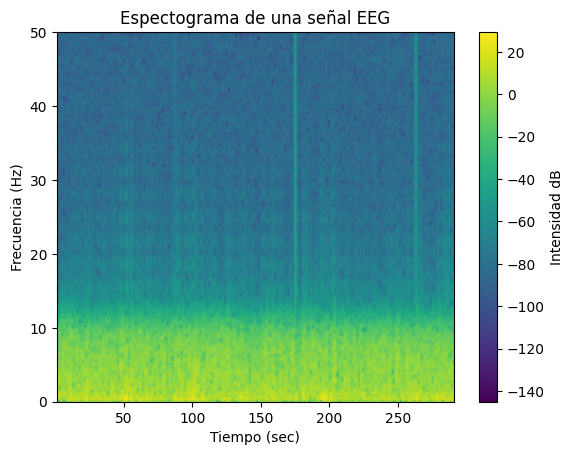

In [10]:
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (sec)')
plt.colorbar(label='Intensidad dB')
plt.title('Espectograma de una señal EEG', fontsize=12)
plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_17172\2248241457.py:17: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  axes.specgram(signals[0][:40], NFFT=NFFT, Fs=Fs, noverlap=noverlap)


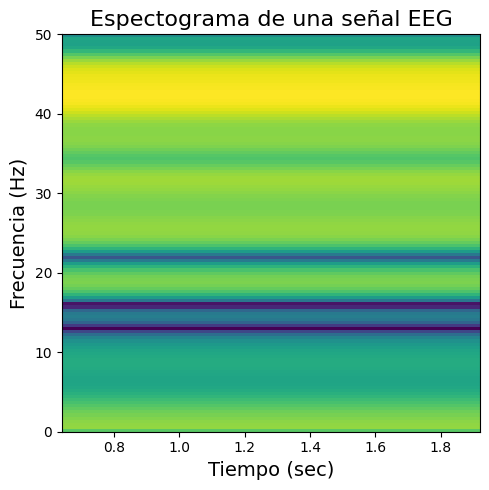

In [3]:
n_samples = 1000
n_channels = 63
signals = np.random.randn(n_channels, n_samples)

# Parameters for the spectrogram
Fs = 100  # Sampling frequency
NFFT = 256  # Length of the FFT window
noverlap = 128  # Number of points of overlap between blocks

# Creating a figure to hold the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# axes = axes.flatten()  # Flatten the array of axes for easy iteration

#for i, ax in enumerate(axes[:1]):
# if i < n_channels:
    # Plotting the spectrogram for each channel
axes.specgram(signals[0][:40], NFFT=NFFT, Fs=Fs, noverlap=noverlap)
axes.set_title(f'Channel {0+1}')
#else:
#    ax.axis('off')  # Turn off the axis for unused subplots
plt.ylabel('Frecuencia (Hz)', fontsize=14)
plt.xlabel('Tiempo (sec)', fontsize=14)
# plt.colorbar(label='Intensidad dB')
plt.title('Espectograma de una señal EEG', fontsize=16)
plt.tight_layout()
plt.show()

"plt.ylabel('Frecuencia (Hz)', fontsize=14)\nplt.xlabel('Tiempo (sec)', fontsize=14)\n# plt.colorbar(label='Intensidad dB')\nplt.title('Espectograma de una señal EEG', fontsize=16)\nplt.tight_layout()\nplt.show()"

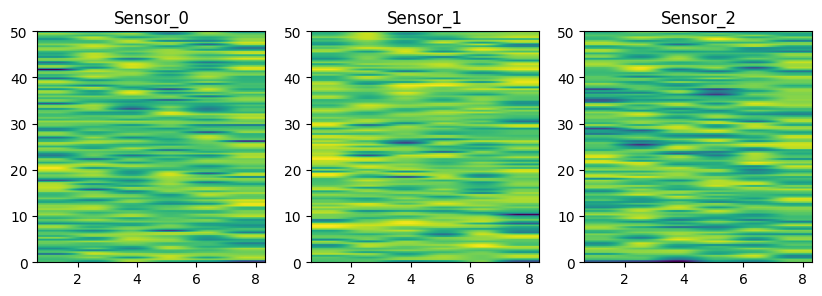

In [24]:
n_samples = 1000
n_channels = 63
signals = np.random.randn(n_channels, n_samples)

# Parameters for the spectrogram
Fs = 100  # Sampling frequency
NFFT = 256  # Length of the FFT window
noverlap = 128  # Number of points of overlap between blocks

# Creating a figure to hold the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, ax in enumerate(axes[:4]):
    if i < n_channels:
        # Plotting the spectrogram for each channel
        ax.specgram(signals[i], NFFT=NFFT, Fs=Fs, noverlap=noverlap)
        ax.set_title(f'Sensor_{i}')
    else:
        ax.axis('off')  # Turn off the axis for unused subplots

"""plt.ylabel('Frecuencia (Hz)', fontsize=14)
plt.xlabel('Tiempo (sec)', fontsize=14)
# plt.colorbar(label='Intensidad dB')
plt.title('Espectograma de una señal EEG', fontsize=16)
plt.tight_layout()
plt.show()"""

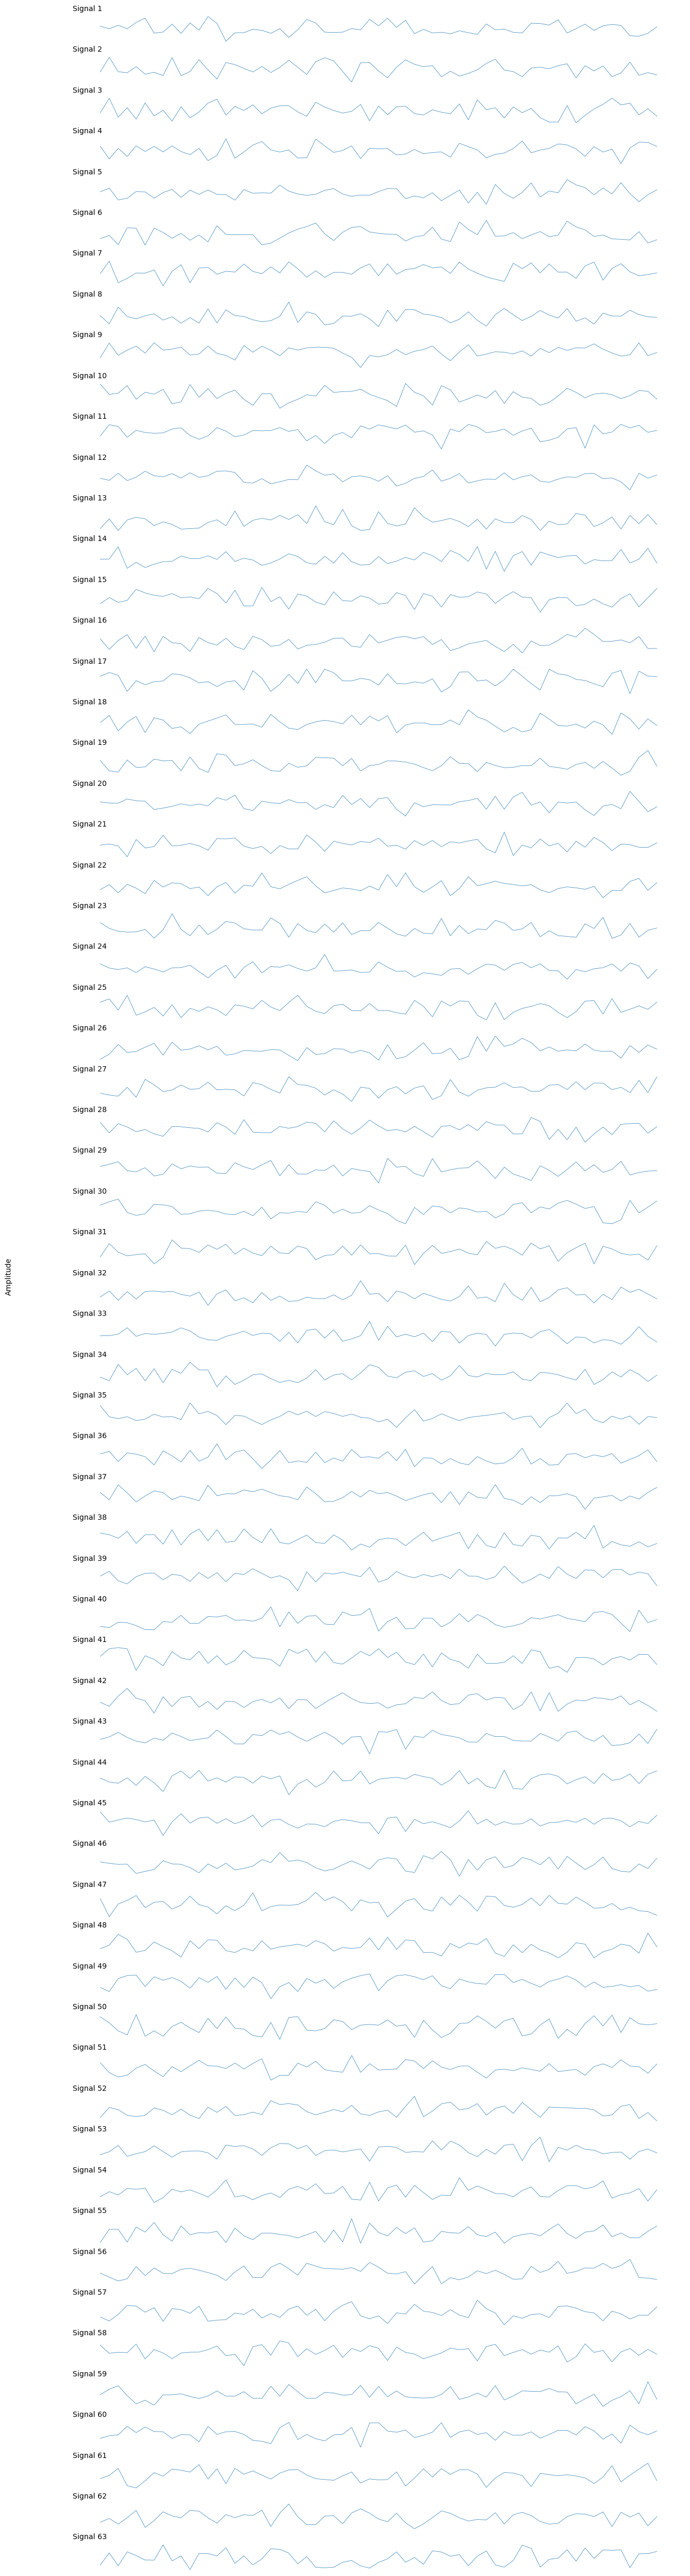

In [31]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=63, ncols=1, figsize=(15, 63), sharex=True)

# Plot each signal
for i, ax in enumerate(axes):
    ax.plot(signals[:, i], linewidth=0.5)
    ax.set_title(f'Signal {i+1}', fontsize=10, loc='left')
    ax.axis('off')  # Turn off axis to make it cleaner, adjust as needed

plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing
plt.xlabel('Time (arbitrary units)')
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical')  # Common y-label

plt.show()